https://www.labri.fr/perso/nrougier/from-python-to-numpy/

### Code vectorization

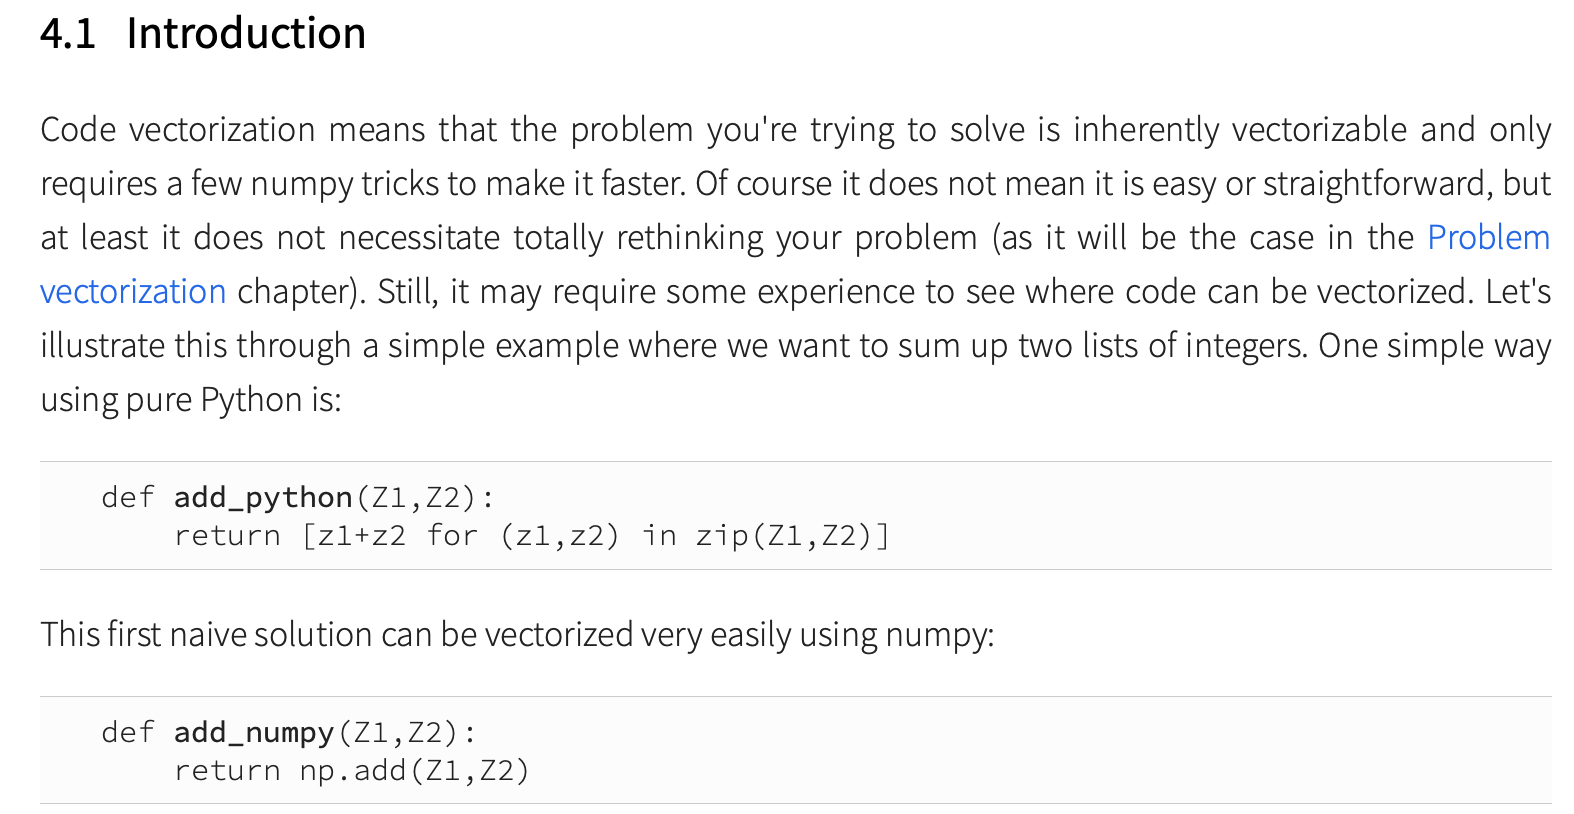

In [61]:
import numpy as np
import random
import timeit
from time import sleep
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def add_python(Z1,Z2):
    return [z1+z2 for (z1,z2) in zip(Z1,Z2)]

In [3]:
def add_numpy(Z1,Z2):
    return np.add(Z1,Z2)

In [11]:
Z1 = random.sample(range(1000), 100)
Z2 = random.sample(range(1000), 100)

In [18]:
%timeit add_python(Z1,Z2)

7.14 µs ± 200 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [19]:
%timeit add_numpy(Z1,Z2)

12.5 µs ± 16.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Uniform vectorization

Uniform vectorization is the simplest form of vectorization where all the elements share the same computation at every time step with no specific processing for any element.
<br>
One stereotypical case is the Game of Life that has been invented by John Conway (see below) and is one of the earliest examples of cellular automata.

### Python implementation

In [86]:
Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]]

In [38]:
def compute_neighbours(Z):
    shape = len(Z), len(Z[0])
    N  = [[0,]*(shape[0]) for i in range(shape[1])]
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]            +Z[x+1][y]   \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [41]:
def iterate(Z):
    N = compute_neighbours(Z)
    shape = len(Z), len(Z[0])
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
             if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                 Z[x][y] = 0
             elif Z[x][y] == 0 and N[x][y] == 3:
                 Z[x][y] = 1
    return Z

In [87]:
iterate(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [20]:
def update(*args):
    global Z, M

    N = (Z[0:-2, 0:-2] + Z[0:-2, 1:-1] + Z[0:-2, 2:] +
         Z[1:-1, 0:-2]                 + Z[1:-1, 2:] +
         Z[2:  , 0:-2] + Z[2:  , 1:-1] + Z[2:  , 2:])
    birth = (N == 3) & (Z[1:-1, 1:-1] == 0)
    survive = ((N == 2) | (N == 3)) & (Z[1:-1, 1:-1] == 1)
    Z[...] = 0
    Z[1:-1, 1:-1][birth | survive] = 1

    # Show past activities
    M[M>0.25] = 0.25
    M *= 0.995
    M[Z==1] = 1
    # Direct activity
    # M[...] = Z
    im.set_data(M)

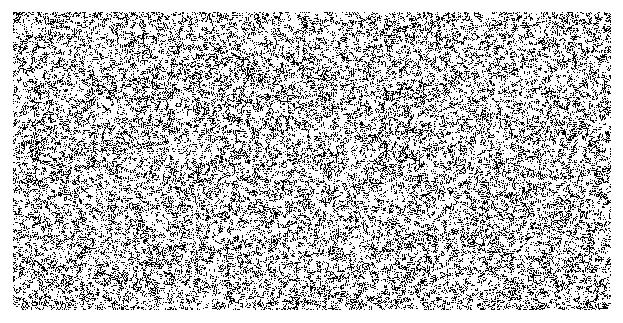

In [33]:
Z = np.random.randint(0, 2, (300, 600))
M = np.zeros(Z.shape)

size = np.array(Z.shape)
dpi = 80.0
figsize = size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(M, interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
plt.xticks([]), plt.yticks([])

animation = FuncAnimation(fig, update, interval=10, frames=2000)
# animation.save('game-of-life.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
#                extra_args=['-pix_fmt', 'yuv420p'],
#                metadata={'artist':'Nicolas P. Rougier'})
plt.show()